# EDA — Bewässerungsdaten (giessdenkiez)

This notebook performs exploratory data analysis on `data/giessdenkiez_bewaesserungsdaten.csv`.

Sections:
1. Setup
2. Load data
3. Cleaning & types
4. Summary & missing values
5. Visualizations: distributions, district totals, tree types
6. Time series: daily & yearly patterns
7. Geospatial analysis (GeoPandas) — point maps and optional choropleth

Save this notebook and run cells in order. If packages are missing, follow the hints in the cells to install them.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (10,5)


In [ ]:
# Adjust the file path if needed
file_path = 'data/giessdenkiez_bewaesserungsdaten.csv'

# Read CSV (semicolon separated)
df = pd.read_csv(file_path, sep=';')


,id,lng,lat,bezirk,art_dtsch,gattung_deutsch,strname,pflanzjahr,timestamp,bewaesserungsmenge_in_liter
0,00008100:00224e5d,13.30562,52.46547,Steglitz-Zehlendorf,Spitz-Ahorn,AHORN,Englerallee,2017.0,2025-10-22 00:00:00+00:00,7.0
1,00008100:001417f0,13.36017,52.48880,Tempelhof-Schöneberg,Silber-Linde 'Szeleste',LINDE,Erdmannstraße,2020.0,2025-10-21 00:00:00+00:00,100.0
2,00008100:001f5836,13.49687,52.57073,Lichtenberg,Holländische Linde,LINDE,Zingster Straße,1989.0,2025-10-17 00:00:00+00:00,30.0
3,00008100:0017d340,13.43520,52.55603,Pankow,Holländische Linde,LINDE,Jacobsohnstraße,1994.0,2025-10-17 00:00:00+00:00,20.0
4,00008100:001abc75,13.59403,52.51573,Marzahn-Hellersdorf,Spitz-Ahorn,AHORN,Zanderstraße,1996.0,2025-10-16 00:00:00+00:00,20.0


In [ ]:
df.head()


In [34]:
print(df.info())

df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 58500 entries, 0 to 58600
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           58500 non-null  object 
 1   lng                          58377 non-null  float64
 2   lat                          58377 non-null  float64
 3   bezirk                       58500 non-null  object 
 4   art_dtsch                    58500 non-null  object 
 5   gattung_deutsch              56207 non-null  object 
 6   strname                      54888 non-null  object 
 7   pflanzjahr                   58294 non-null  Int64  
 8   bewaesserungsmenge_in_liter  58500 non-null  float64
 9   date                         27497 non-null  object 
 10  year                         27497 non-null  Int64  
 11  month                        27497 non-null  Int64  
dtypes: Int64(3), float64(3), object(6)
memory usage: 6.0+ MB
None


,id,lng,lat,bezirk,art_dtsch,gattung_deutsch,strname,pflanzjahr,bewaesserungsmenge_in_liter,date,year,month
count,58500,58377.000000,58377.000000,58500,58500,56207,54888,58294.0,58500.000000,27497,27497.0,27497.0
unique,11242,NaN,NaN,12,296,54,2003,<NA>,NaN,905,<NA>,<NA>
top,00008100:001557cd,NaN,NaN,Charlottenburg-Wilmersdorf,Winter-Linde,LINDE,Thomasiusstraße,<NA>,NaN,2022-08-14,<NA>,<NA>
freq,736,NaN,NaN,8420,6331,24165,856,<NA>,NaN,370,<NA>,<NA>
mean,NaN,13.423227,52.470066,NaN,NaN,NaN,NaN,1992.306241,38.353744,NaN,2022.871804,6.714914
std,NaN,1.202407,1.199813,NaN,NaN,NaN,NaN,22.967125,31.014426,NaN,1.179409,1.403218
min,NaN,13.121440,13.285453,NaN,NaN,NaN,NaN,1808.0,1.000000,NaN,2022.0,1.0
25%,NaN,13.327530,52.478700,NaN,NaN,NaN,NaN,1980.0,10.000000,NaN,2022.0,6.0
50%,NaN,13.379750,52.505470,NaN,NaN,NaN,NaN,1996.0,30.000000,NaN,2022.0,7.0
75%,NaN,13.435200,52.533970,NaN,NaN,NaN,NaN,2011.0,50.000000,NaN,2024.0,8.0


In [17]:
# Missing values overview
missing = df.isna().sum().sort_values(ascending=False)
missing[missing>0]


strname            3620
gattung_deutsch    2296
pflanzjahr          206
lng                 123
lat                 123
dtype: int64

# Data cleaning & type conversions

In [18]:
# timestamp -> datetime
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# numeric conversions
for col in ['bewaesserungsmenge_in_liter','lng','lat']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df['pflanzjahr'] = pd.to_numeric(df['pflanzjahr'], errors='coerce').astype('Int64')

# Extract date features and convert if necessary
if 'timestamp' in df.columns:
    df['date'] = df['timestamp'].dt.date 
    df['year'] = df['timestamp'].dt.year.astype('Int64')
    df['month'] = df['timestamp'].dt.month.astype('Int64')

# remove timestamps because they're all at 00:00:00+00:00, just date counts
df = df.drop(columns='timestamp')

print('After conversions:')
df[['pflanzjahr','date','year','month']].head()


After conversions:


,pflanzjahr,date,year,month
0,2017,2025-10-22,2025,10
1,2020,2025-10-21,2025,10
2,1989,2025-10-17,2025,10
3,1994,2025-10-17,2025,10
4,1996,2025-10-16,2025,10


In [ ]:
# remove probable outliers
threshold = df['bewaesserungsmenge_in_liter'].quantile(0.999)
print(f"threshold bewaesserungsmenge: {threshold}")
df_no_outliers = df[df['bewaesserungsmenge_in_liter'] <= threshold]
removed = df[df['bewaesserungsmenge_in_liter'] > threshold]
removed['bewaesserungsmenge_in_liter'].describe()

# does it make sense that people watered more than 300l at one time? not sure, even 150l sounds off but there are still 479 entries above that value, whereas only 42 above 300l
# therefore I continue with all data below the 99.9 percentile
df = df_no_outliers


threshold bewaesserungsmenge: 227.21000000005006


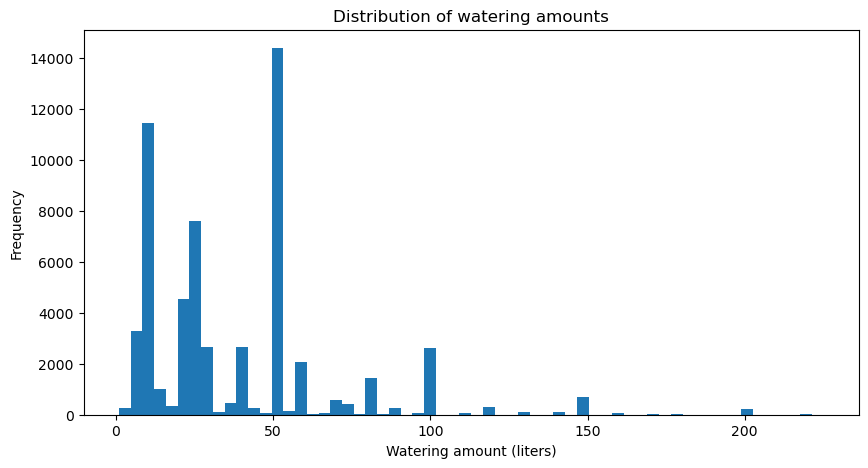

count    58500.000000
mean        38.353744
std         31.014426
min          1.000000
25%         10.000000
50%         30.000000
75%         50.000000
max        225.000000
Name: bewaesserungsmenge_in_liter, dtype: float64


In [25]:
# Distribution of watering amounts
plt.hist(df['bewaesserungsmenge_in_liter'].dropna(), bins=60)
plt.xlabel('Watering amount (liters)')
plt.ylabel('Frequency')
plt.title('Distribution of watering amounts')
plt.show()

# Show some statistics to understand outliers
print(df['bewaesserungsmenge_in_liter'].describe())


bezirk
Mitte                         357873.0
Charlottenburg-Wilmersdorf    323165.0
Tempelhof-Schöneberg          313875.0
Friedrichshain-Kreuzberg      284774.0
Pankow                        261374.0
Steglitz-Zehlendorf           183309.0
Neukölln                      159085.0
Treptow-Köpenick              111179.0
Lichtenberg                   109156.0
Reinickendorf                  91540.0
Marzahn-Hellersdorf            37069.0
Spandau                        11295.0
Name: bewaesserungsmenge_in_liter, dtype: float64

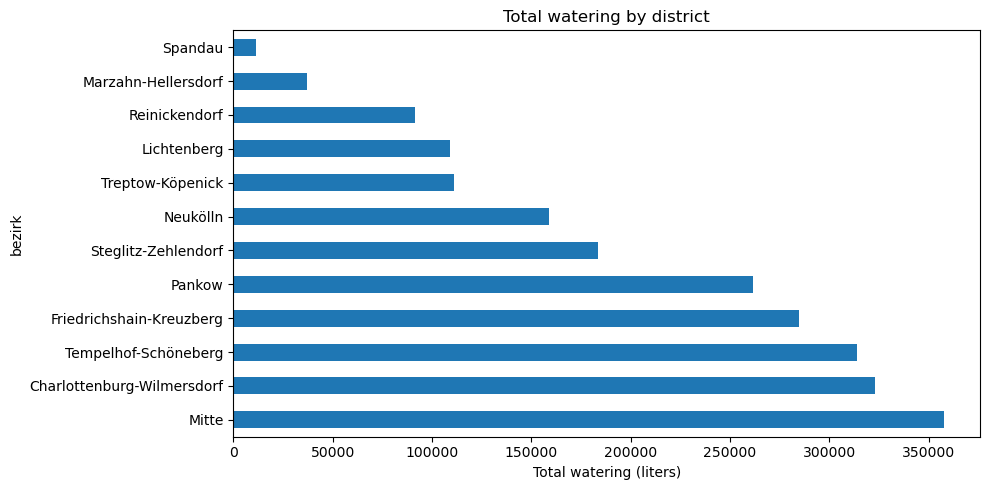

In [33]:
# Total watering by district (bezirk)
if 'bezirk' in df.columns:
    district_totals = df.groupby('bezirk')['bewaesserungsmenge_in_liter'].sum().sort_values(ascending=False)
    display(district_totals)
    district_totals.plot(kind='barh')
    plt.xlabel('Total watering (liters)')
    plt.title('Total watering by district')
    plt.tight_layout()
    plt.show()
else:
    print('Column "bezirk" not found')


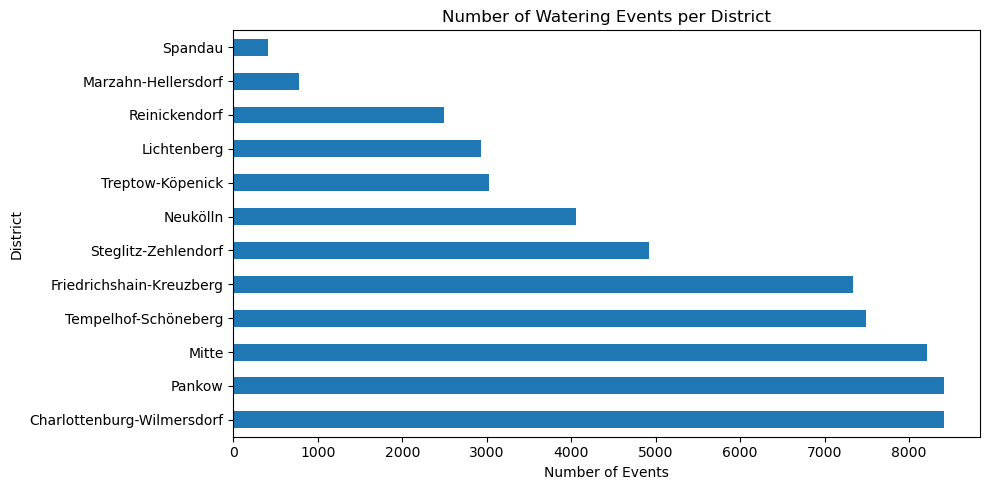

In [31]:
# watering events by district
events_per_district = df['bezirk'].value_counts().sort_values(ascending=False)
events_per_district

events_per_district.plot(kind='barh')

plt.title('Number of Watering Events per District')
plt.xlabel('Number of Events')
plt.ylabel('District')
plt.tight_layout()
plt.show()


gattung_deutsch
LINDE           899812.0
AHORN           398258.0
ROSSKASTANIE    101719.0
HASEL            89436.0
EICHE            82000.0
PLATANE          70495.0
WEIßDORN         63141.0
HAINBUCHE        62839.0
ULME             44047.0
ESCHE            43912.0
BIRNE            39769.0
BIRKE            36116.0
MEHLBEERE        35827.0
ROBINIE          30711.0
GINKGO           28254.0
GLEDITSCHIE      22388.0
PAPPEL           20324.0
AMBERBAUM        13668.0
ERLE              8856.0
HOPFENBUCHE       6030.0
MAGNOLIE          5793.0
APFEL             5482.0
HARTRIEGEL        5311.0
KASTANIE          4751.0
WALNUSS           2870.0
Name: bewaesserungsmenge_in_liter, dtype: float64

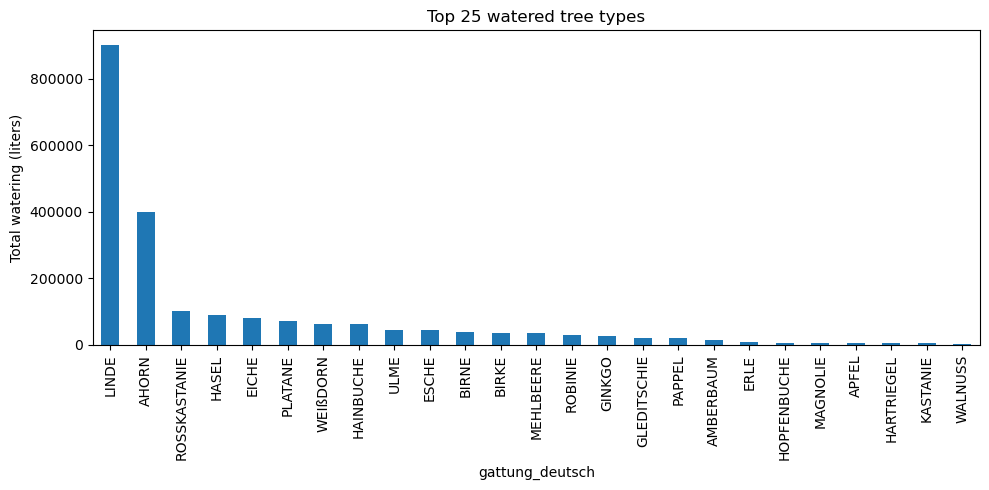

In [27]:
# Top watered tree types (gattung_deutsch)
if 'gattung_deutsch' in df.columns:
    tree_totals = df.groupby('gattung_deutsch')['bewaesserungsmenge_in_liter'].sum().sort_values(ascending=False).head(25)
    display(tree_totals)
    tree_totals.plot(kind='bar')
    plt.ylabel('Total watering (liters)')
    plt.title('Top 25 watered tree types')
    plt.tight_layout()
    plt.show()
else:
    print('Column "gattung_deutsch" not found')


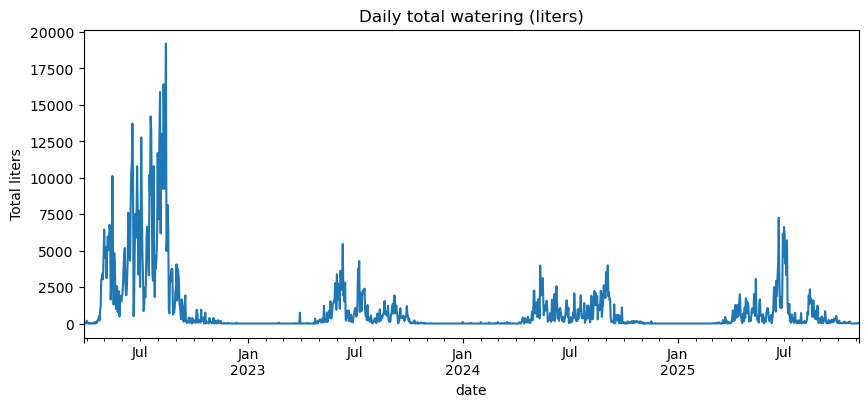

year
2022    746145.0
2023    144322.0
2024    155586.0
2025    170456.0
Name: bewaesserungsmenge_in_liter, dtype: float64

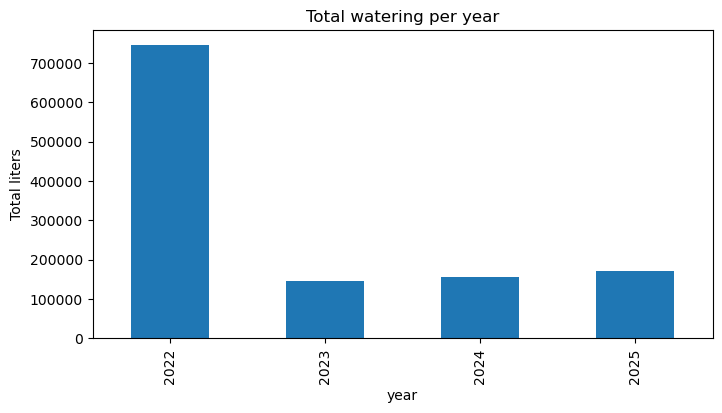

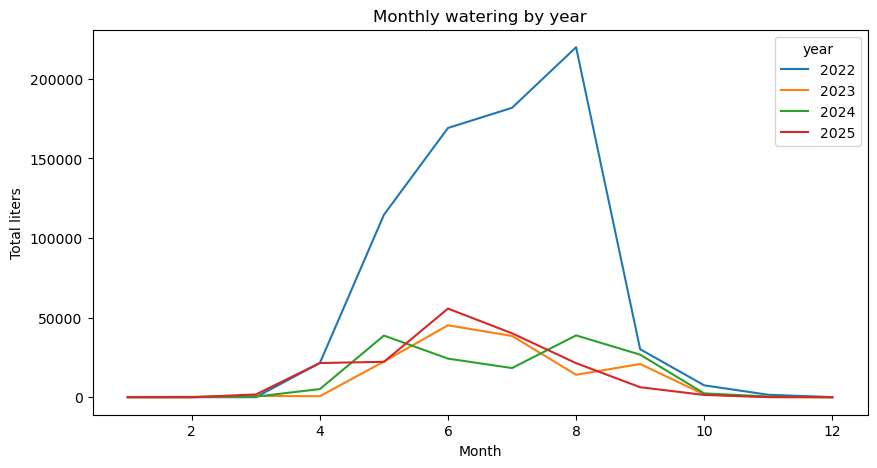

In [40]:
import matplotlib.pyplot as plt

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Daily totals
daily = (
    df.set_index('date')
      .resample('D')['bewaesserungsmenge_in_liter']
      .sum()
)

daily.plot(title='Daily total watering (liters)', figsize=(10,4))
plt.ylabel('Total liters')
plt.show()

# Yearly totals
yearly = (
    df.groupby('year')['bewaesserungsmenge_in_liter']
      .sum()
      .sort_index()
)

display(yearly)

yearly.plot(
    kind='bar',
    title='Total watering per year',
    ylabel='Total liters',
    figsize=(8,4)
)
plt.show()

# Monthly seasonality
monthly = (
    df.groupby(['year','month'])['bewaesserungsmenge_in_liter']
      .sum()
      .unstack(level=0)
      .fillna(0)
)

# Select last 6 years dynamically
last_years = sorted(df['year'].dropna().unique())

monthly[last_years].plot(
    title='Monthly watering by year',
    xlabel='Month',
    ylabel='Total liters',
    figsize=(10,5)
)
plt.show()


## Geospatial analysis
### WIP
This section attempts to use GeoPandas to create geospatial visualizations. 

,id,lng,lat,bezirk,art_dtsch,gattung_deutsch,strname,pflanzjahr,bewaesserungsmenge_in_liter,date,year,month,geometry
0,00008100:00224e5d,13.30562,52.46547,Steglitz-Zehlendorf,Spitz-Ahorn,AHORN,Englerallee,2017,7.0,2025-10-22,2025,10,POINT (13.30562 52.46547)
1,00008100:001417f0,13.36017,52.48880,Tempelhof-Schöneberg,Silber-Linde 'Szeleste',LINDE,Erdmannstraße,2020,100.0,2025-10-21,2025,10,POINT (13.36017 52.4888)
2,00008100:001f5836,13.49687,52.57073,Lichtenberg,Holländische Linde,LINDE,Zingster Straße,1989,30.0,2025-10-17,2025,10,POINT (13.49687 52.57073)
3,00008100:0017d340,13.43520,52.55603,Pankow,Holländische Linde,LINDE,Jacobsohnstraße,1994,20.0,2025-10-17,2025,10,POINT (13.4352 52.55603)
4,00008100:001abc75,13.59403,52.51573,Marzahn-Hellersdorf,Spitz-Ahorn,AHORN,Zanderstraße,1996,20.0,2025-10-16,2025,10,POINT (13.59403 52.51573)


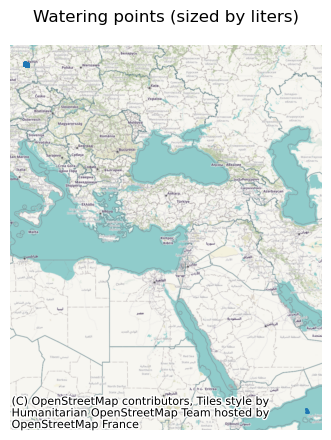

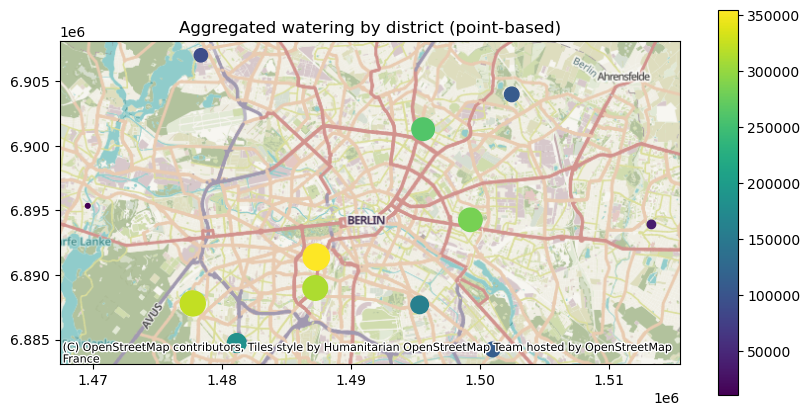


Note: For a true choropleth you need a GeoJSON or shapefile of Berlin districts.
Load it via gpd.read_file("path/to/bezirk.geojson") and then merge with the aggregated sums.


In [29]:
# Geospatial: points map using GeoPandas
try:
    import geopandas as gpd
    from shapely.geometry import Point
    gpd_available = True
except Exception as e:
    print('GeoPandas not available:', e)
    gpd_available = False

if not gpd_available:
    print('\nTo install GeoPandas in this environment, run:')
    print('!pip install geopandas rtree pyproj shapely')
    print('\n(You may also need contextily if you want basemaps: !pip install contextily)')
else:
    # create GeoDataFrame from lng/lat
    if 'lng' in df.columns and 'lat' in df.columns:
        gdf = gpd.GeoDataFrame(df.dropna(subset=['lng','lat']).copy(),
                               geometry = gpd.points_from_xy(df.dropna(subset=['lng','lat'])['lng'],
                                                             df.dropna(subset=['lng','lat'])['lat']),
                               crs='EPSG:4326')
        display(gdf.head())
        # Simple scatter of points (WebMercator for contextily)
        try:
            import contextily as ctx
            has_ctx = True
        except Exception:
            has_ctx = False

        # Convert to web mercator for plotting basemap
        gdf_web = gdf.to_crs(epsg=3857)
        # ax = gdf_web.plot(markersize=gdf_web['bewaesserungsmenge_in_liter'].fillna(0).clip(lower=0)/2 + 1, alpha=0.6)
        ax = gdf_web.plot(markersize=1, alpha=0.6)
        ax.set_axis_off()
        if has_ctx:
            ctx.add_basemap(ax)
        plt.title('Watering points (sized by liters)')
        plt.show()

        # Optional: aggregate by district centroids
        if 'bezirk' in gdf.columns:
            agg = gdf.groupby('bezirk').agg({'bewaesserungsmenge_in_liter':'sum', 'geometry':'first'})
            agg_gdf = gpd.GeoDataFrame(agg, geometry='geometry', crs=gdf.crs)
            agg_web = agg_gdf.to_crs(epsg=3857)
            ax = agg_web.plot(column='bewaesserungsmenge_in_liter', legend=True, markersize=agg_web['bewaesserungsmenge_in_liter']/1000)
            if has_ctx:
                ctx.add_basemap(ax)
            plt.title('Aggregated watering by district (point-based)')
            plt.show()

        print('\nNote: For a true choropleth you need a GeoJSON or shapefile of Berlin districts.\n'
              'Load it via gpd.read_file("path/to/bezirk.geojson") and then merge with the aggregated sums.')
    else:
        print('Columns "lng" and/or "lat" not found; cannot create point GeoDataFrame')


In [30]:
# (Optional) Save cleaned/typed version for future analysis
clean_path = 'data/cleaned_bewaesserungsdaten.csv'
df.to_csv(clean_path, index=False)
print('Saved cleaned CSV to', clean_path)


Saved cleaned CSV to data/cleaned_bewaesserungsdaten.csv


### Notes & next steps

- change years and month data types to int -- done
- remove timestamps because they're all at 00:00:00+00:00, just date counts -- done
- remove outliers (watering amount unreasonable) -- done
- count amounts of water events per district -- done
- are ids the tree ids?

- For a district choropleth: obtain a GeoJSON of Berlin districts ("Bezirk") and merge on the district name (`bezirk`).
